In [14]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [15]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [16]:
# Define parameters
N=10
lmd = 0.0346746
J = 0.5

state_dictionary = {"1":1}
state_dictionary = {"11":1, "10":3, "00":1}
#state_dictionary = {"0":1, "1":1}
#state_dictionary = {"001":1}

ti = 0
tf = np.pi/lmd
Nsteps = 500

In [17]:
initial_state = md.create_domain_wall_state(state_dictionary, register= "Alice", one_step=False)
final_state   = md.create_domain_wall_state(state_dictionary, register= "Bob",   one_step=False)

register_size = len(initial_state.dims[0])

initial_chain = md.initialize_general_system(N, initial_state, register='Alice')
final_chain =   md.initialize_general_system(N, final_state,   register='Bob'  )

In [18]:
H_t = Ham.Hamiltonian(system_size = N,
                    mode = "transport",
                    lambda_factor = lmd,
                    global_J = J
                    )

H_r = Ham.Hamiltonian(system_size = N,
                    mode = "reset",
                    lambda_factor = lmd,
                    register_size = register_size,
                    global_J = J
                    )

H_c = Ham.Hamiltonian(system_size = N,
                    mode = "correction",
                    lambda_factor = lmd,
                    global_J = J
                    )

In [19]:
#transport_steps, transport_time = dyn.chain_calibration(initial_chain, H_t, ti, tf, Nsteps)
#print(transport_time)

In [20]:
# test that algorithm works well without errors
fidelity, magnetizations, corrected_fidelity = dyn.OneStepAlgorithm(initial_chain, final_chain, H_t, ti, tf, Nsteps, factor = 1.00, correction="Full", H_correction=H_c)

In [21]:

print(max(fidelity))
print(fidelity[-1])
print(max(corrected_fidelity))
print(corrected_fidelity[-1])

division = divmod(2*J*np.pi/lmd,2*np.pi)
integer_division = division[0]
rest = division[1]
time = rest/J
print(integer_division, rest, time)

0.26697438696924225
0.17973763635164
0.2678361603579569
0.18024956279302679
14.0 2.6375367576607402 5.2750735153214805


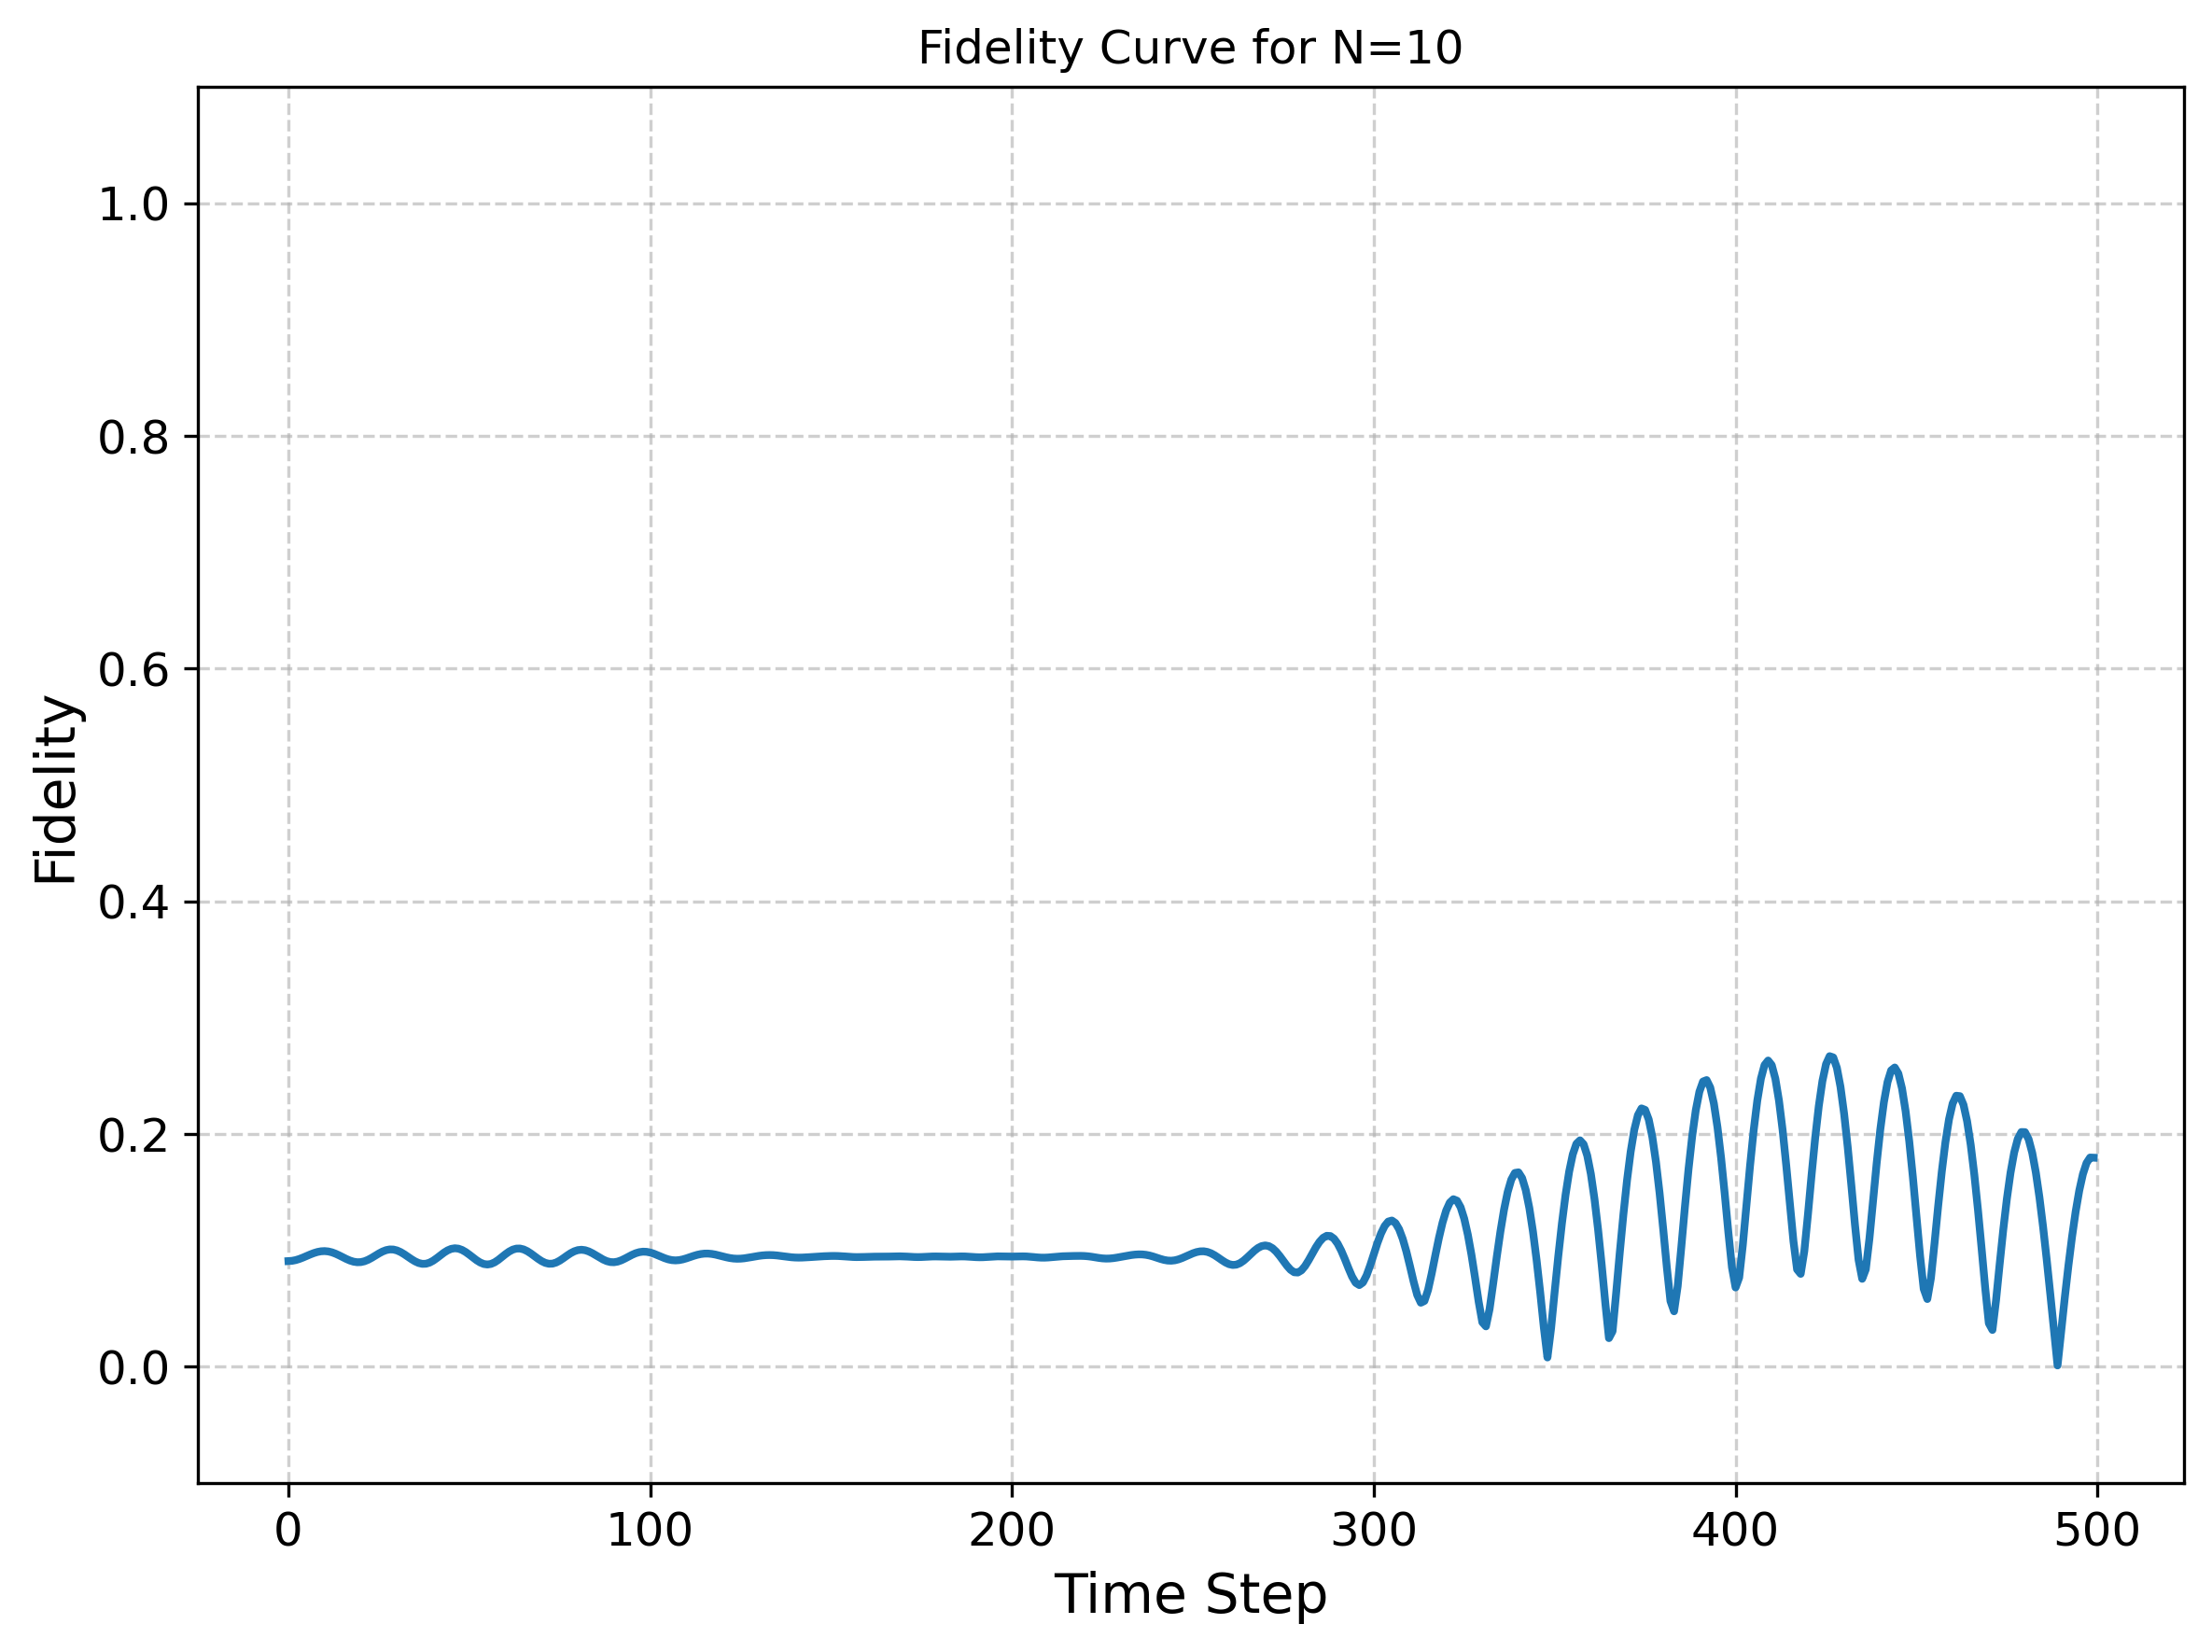

In [22]:
plots.plot_fidelity(fidelity, N)

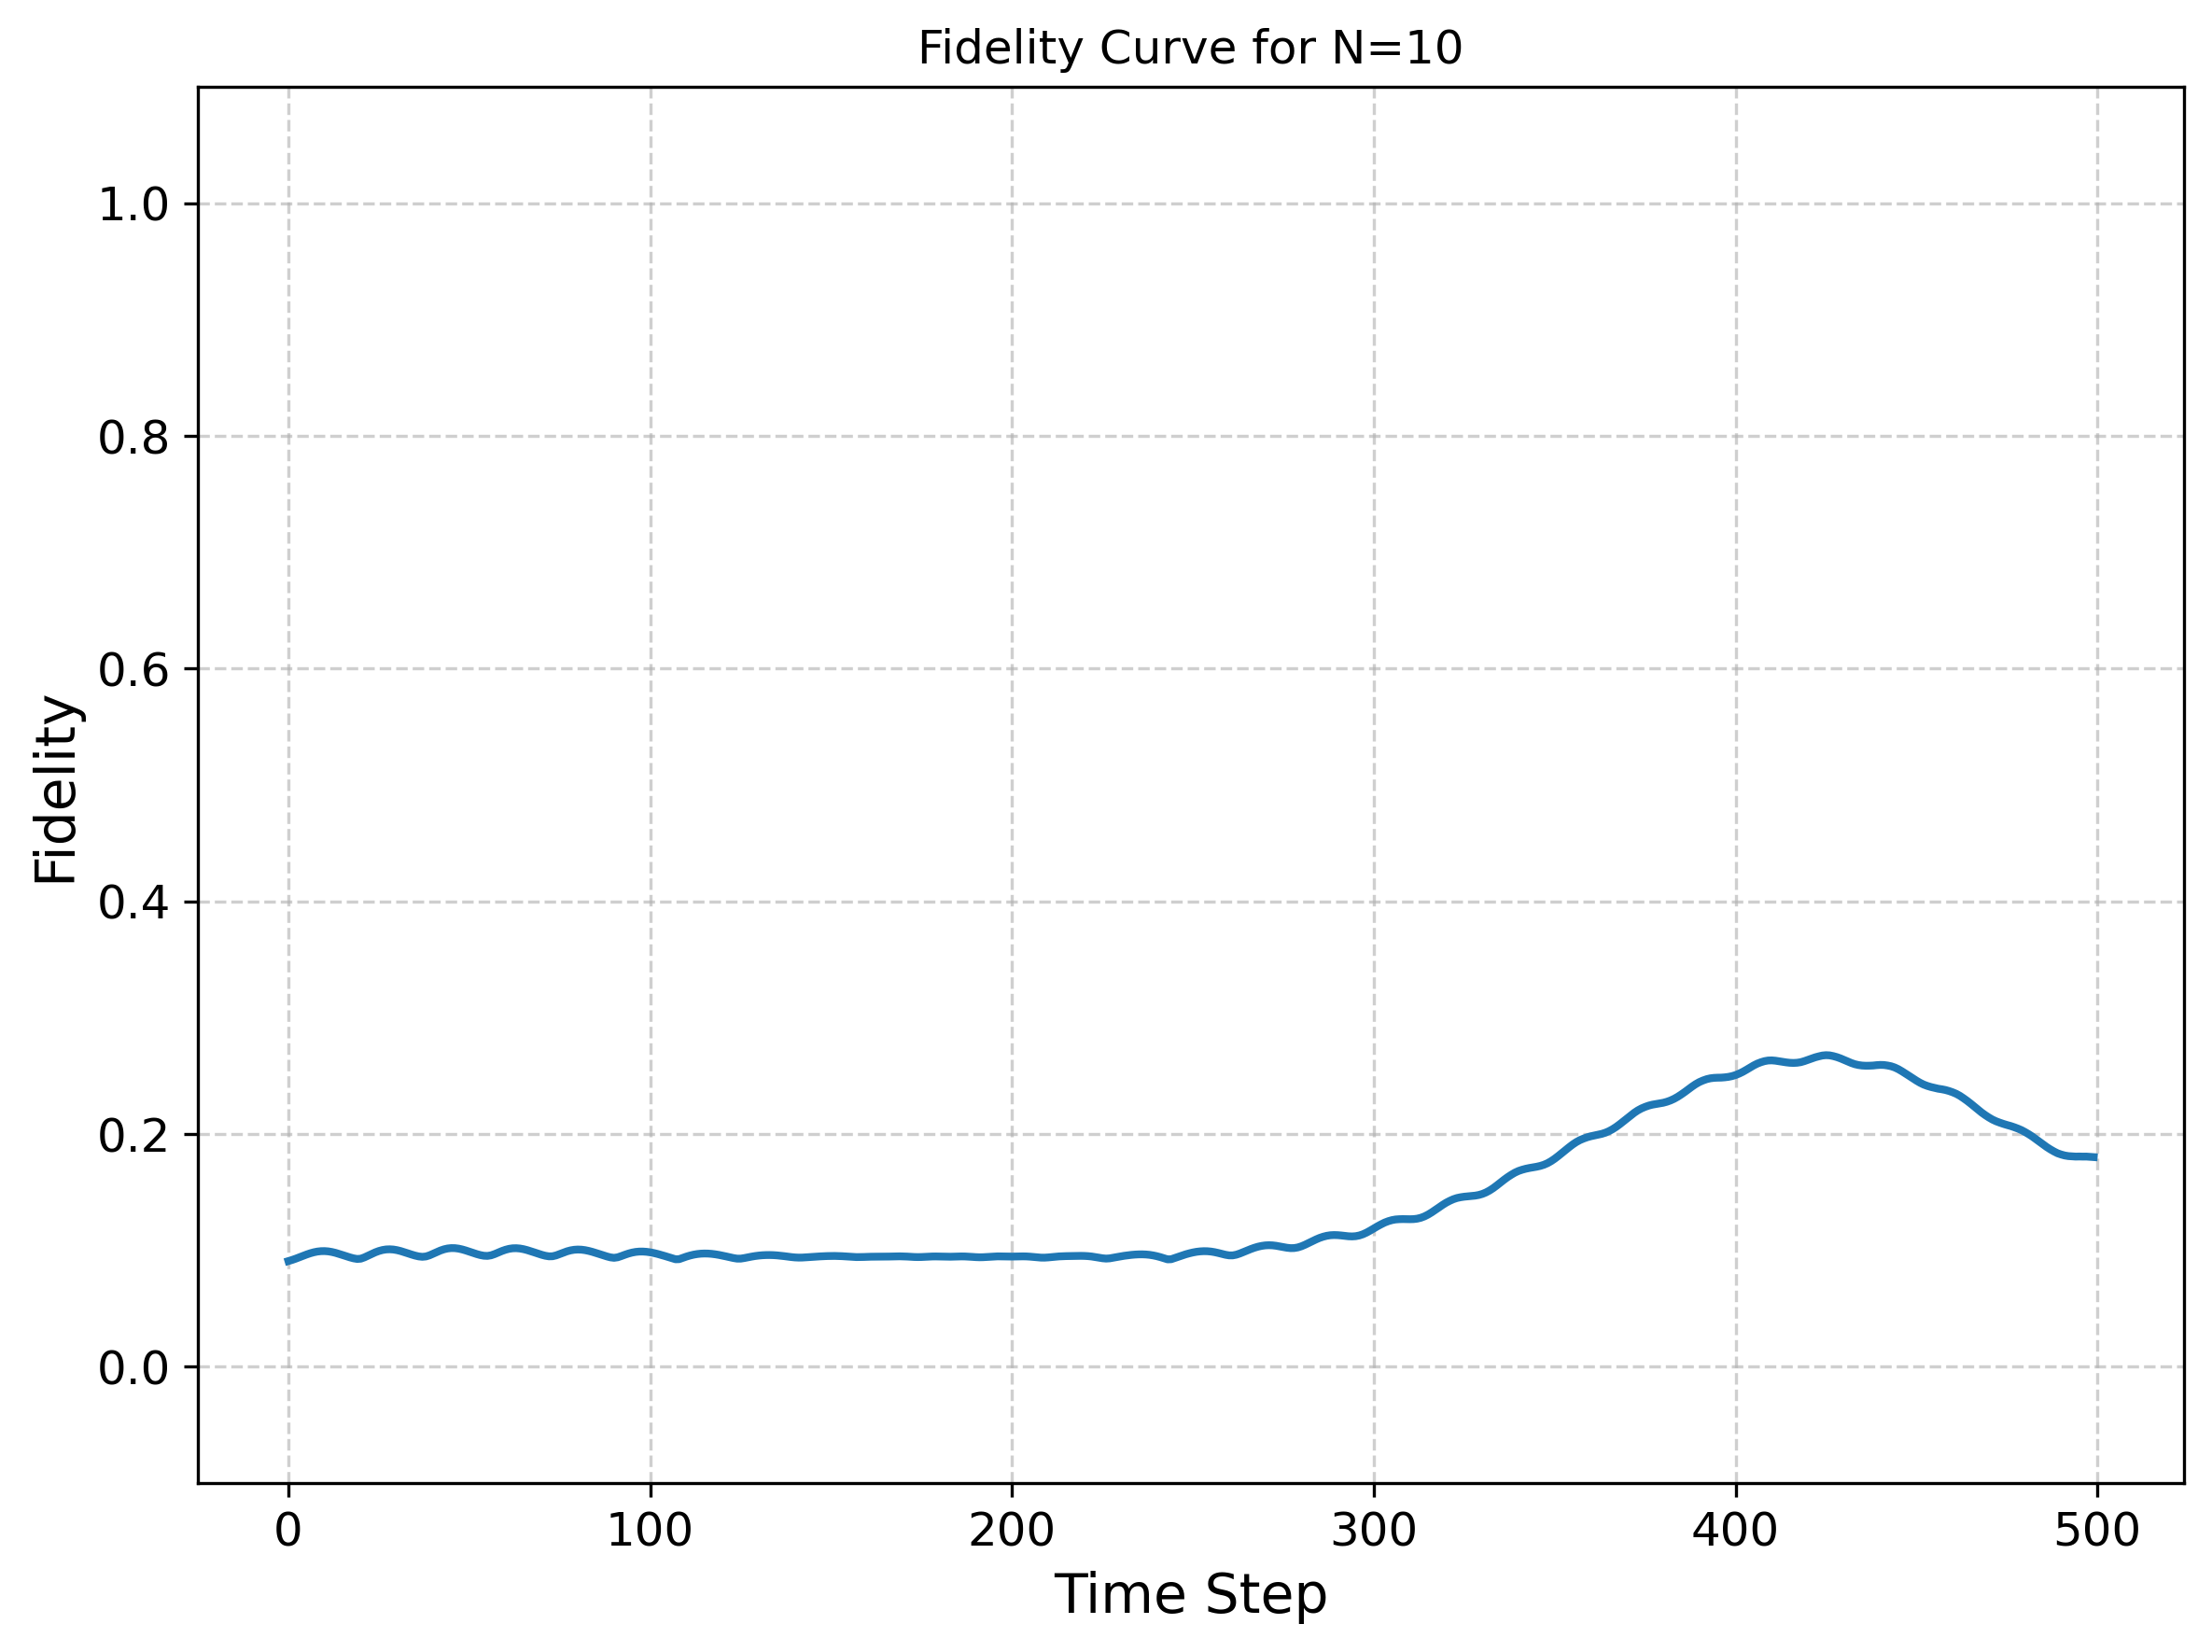

0.2678361603579569


In [23]:
plots.plot_fidelity(corrected_fidelity, N)
print(max(corrected_fidelity))

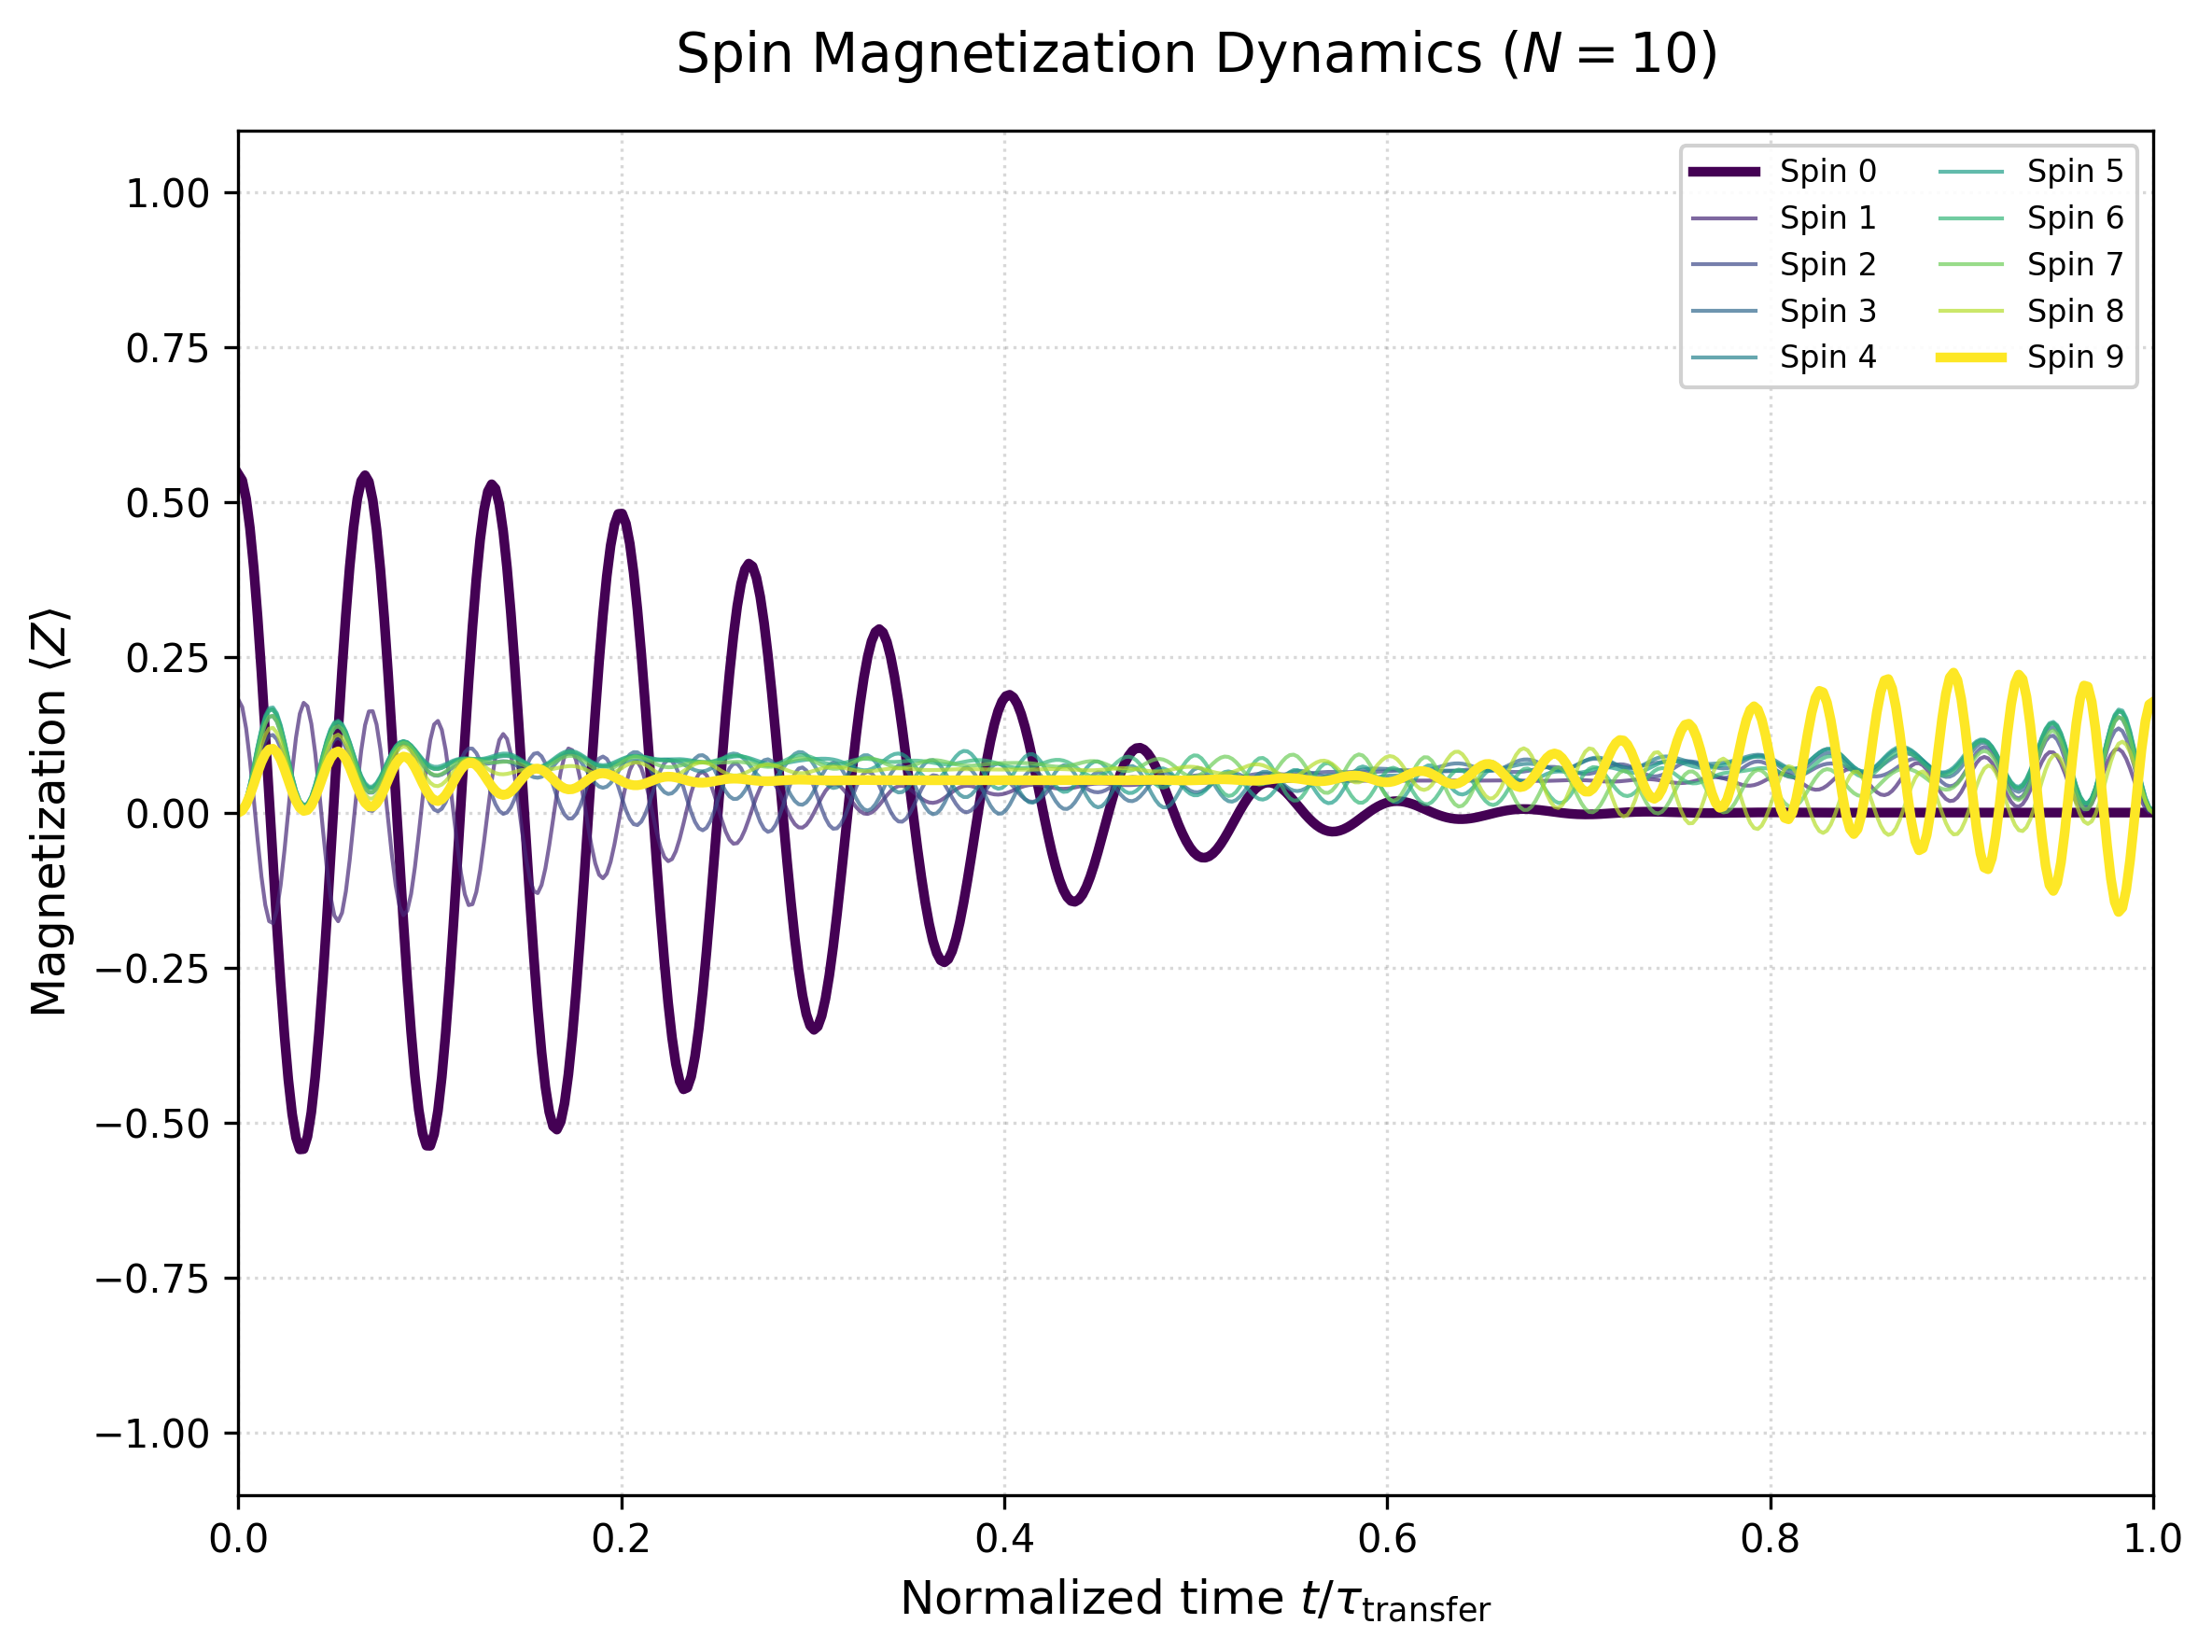

In [24]:
plots.plot_expectations_gradient(magnetizations["Sx"], N)

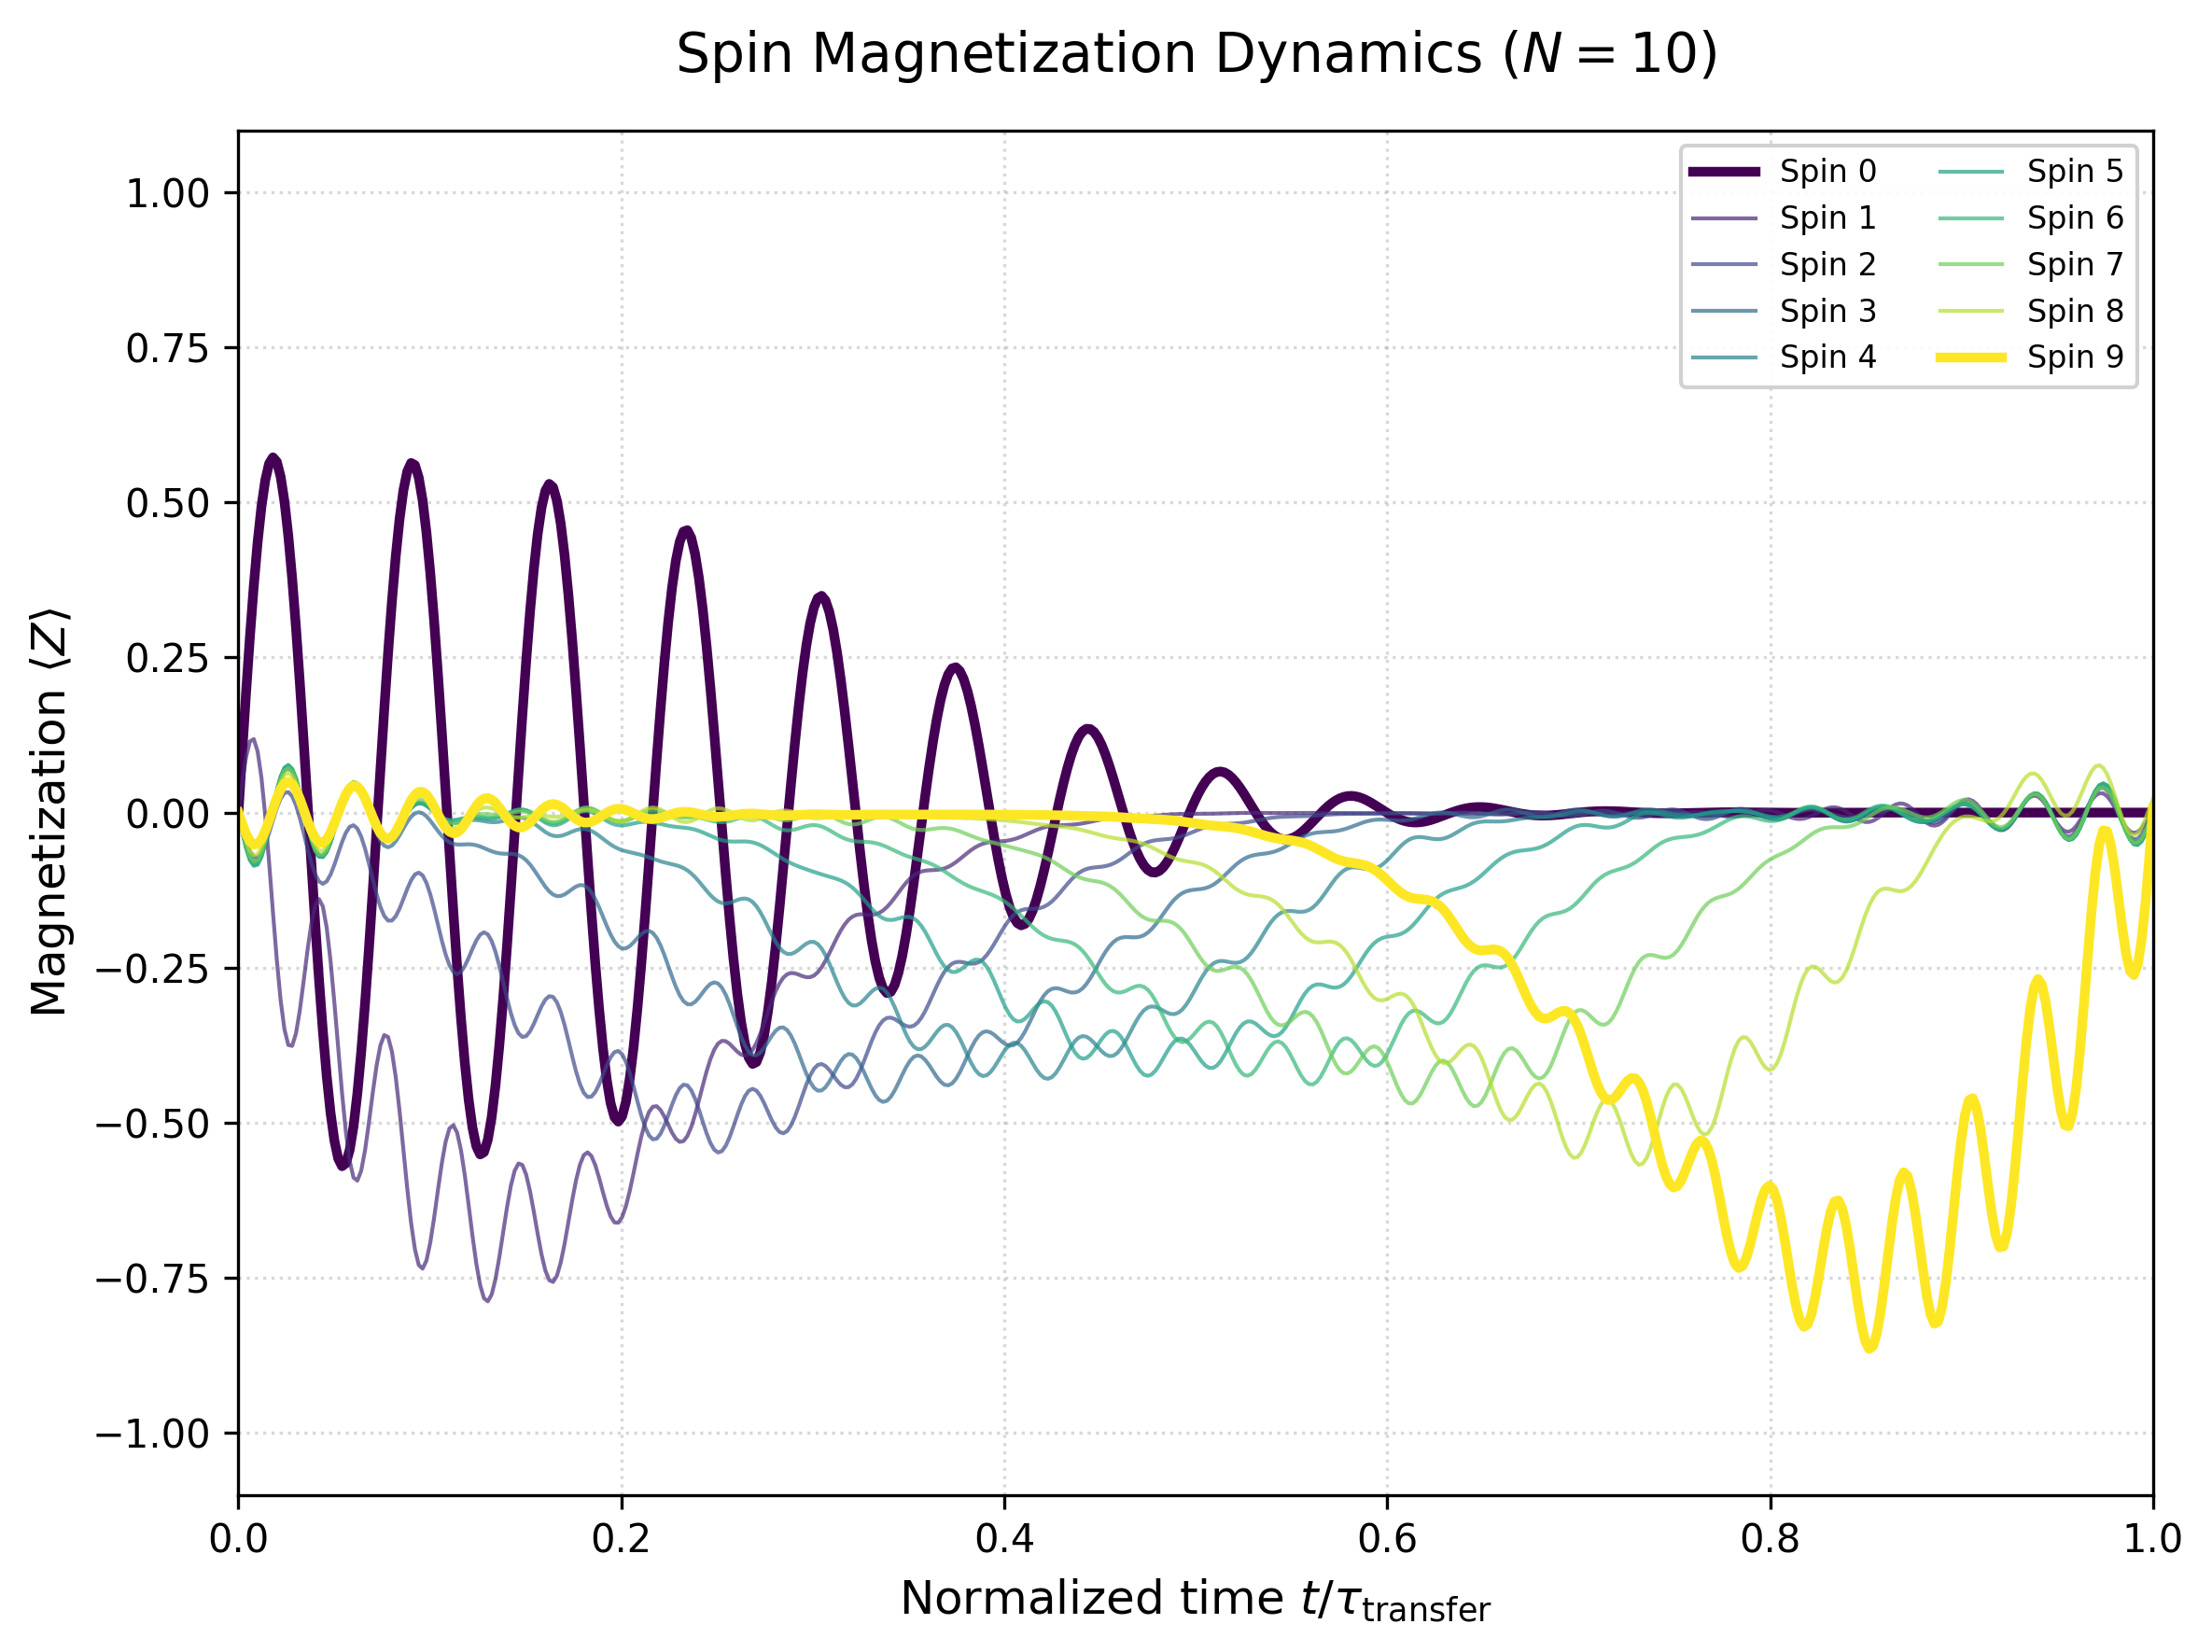

In [25]:
plots.plot_expectations_gradient(magnetizations["Sy"], N)

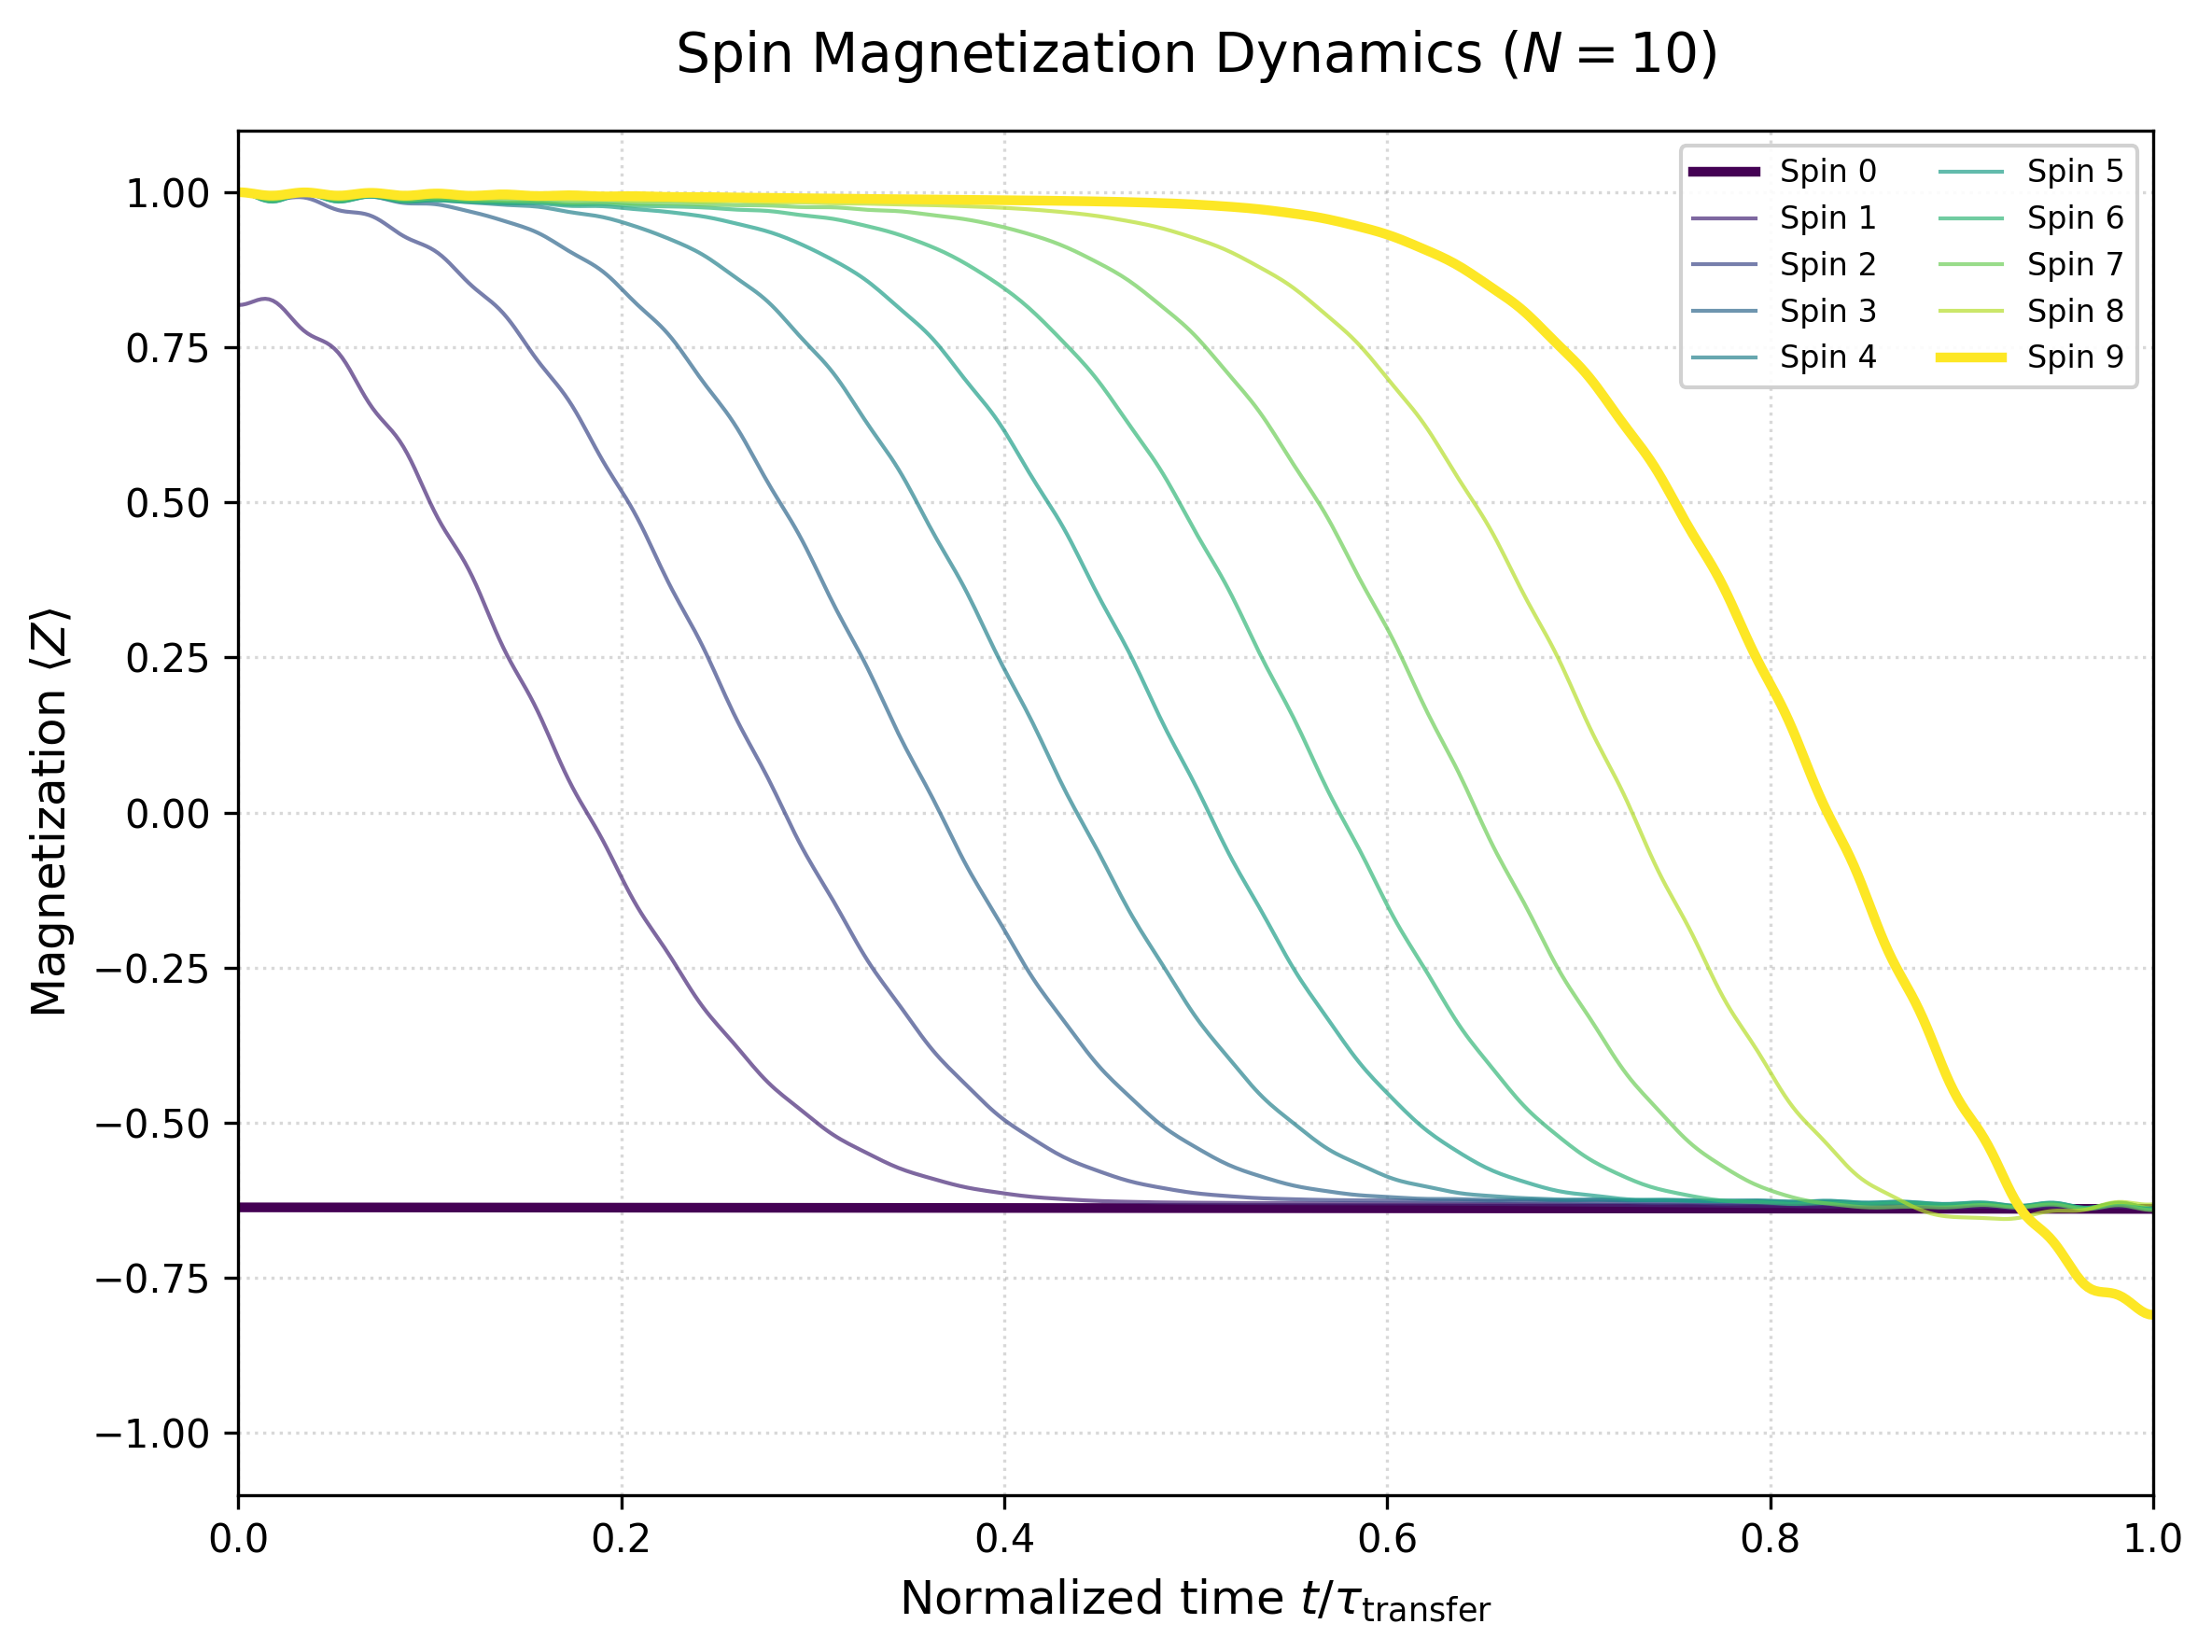

In [26]:
plots.plot_expectations_gradient(magnetizations["Sz"], N)